In [1]:
import pandas as pd

In [2]:
vid = "RNXqM8vdw4M"
df = pd.read_csv("../data/RNXqM8vdw4M.csv", lineterminator='\n')

In [3]:
try:
    df.drop("Unnamed: 0", axis=1, inplace=True)
except:
    print("Already Deleted")

In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12147 entries, 0 to 12146
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   date     12147 non-null  datetime64[ns, UTC]
 1   name     12147 non-null  object             
 2   comment  11953 non-null  object             
 3   like     12147 non-null  int64              
 4   replies  12147 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 474.6+ KB


In [6]:
!pip install nltk

In [7]:
import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [9]:
df.dropna(inplace=True)

In [10]:
neg = []
pos = []
comp = []
neu = []


for x in df["comment"]:
    score = sid.polarity_scores(x)
    comp += [ score["compound"] ]
    neu += [ score["neu"] ]
    pos += [ score["pos"] ]
    neg += [ score["neg"] ]


df["score_neg"] = neg
df["score_pos"] = pos
df["score_neu"] = neu
df["score_comp"] = comp
                                                                              

In [11]:
df.sort_values("like", ascending=False)

,date,name,comment,like,replies,score_neg,score_pos,score_neu,score_comp
6988,2023-05-06 10:32:32+00:00,@thomasthomasphilp4393,I am a Kerala Christian. He is absolutely correct,5649,120,0.000,0.000,1.000,0.0000
9633,2023-05-05 19:08:45+00:00,@supersaiyan3704,Being a Malayali I can totally vouch for what ...,5073,255,0.000,0.000,1.000,0.0000
5806,2023-05-07 07:11:27+00:00,@ck3289,I am an ex -christian and this single video ha...,3935,56,0.000,0.173,0.827,0.7424
12143,2023-05-05 15:31:03+00:00,@cosmosloungerelaxationmusi2679,AMAZZZZZZZZZINNNNNNNGGGGGGGGGGGG JAI SAI DEEPAK,3756,41,0.000,0.000,1.000,0.0000
11994,2023-05-05 15:42:31+00:00,@dhruba5849,J Sai Deepak Sir has opened my eyes. I never ...,3326,171,0.000,0.071,0.929,0.2455
...,...,...,...,...,...,...,...,...,...
7083,2023-05-06 09:46:51+00:00,@kiranrajpurohit7307,"OMG! it's J Sai Deepak in the house, The Rocks...",0,0,0.000,0.000,1.000,0.0000
7082,2023-05-06 09:47:46+00:00,@FaheemRazaAnsari,I'm not a supporter of any right or left or ce...,0,0,0.088,0.118,0.794,0.9334
1800,2023-06-30 09:44:54+00:00,@spirited__,What an episode,0,0,0.000,0.000,1.000,0.0000
3603,2023-05-13 17:43:25+00:00,@rajendrakhadye8783,J sai deepak sir ka hindi main broadcast karol...,0,0,0.000,0.000,1.000,0.0000


# Visualization Ideas


Video Info
---
- Title, Description.
- Like, Dislike, Comment Counts.


Intra Video Vistualization
---


- Feature Of Top Liked Comments and Replied Once.

- Sentiment Distribution ?
- Word Cloud



- Done
1. Pie Plot
2. Commenter Engagement Over A Time, To Gauge Peak Activity.
3. Overall Sentiment Of Commenters.

4. Correlation Between Like, Replies and Sentiment (Heatmaps)
5. How People Sentiment Changes Over Time, (Sample Each Month).



# Future Idea

- Following Attribute Existance In Comment (Religion, Caste, Gender,)



In [12]:
from matplotlib import pyplot as plt
import seaborn as sea

In [13]:
df["month"] = df["date"].apply(lambda x : x.strftime("%Y-%m"))

In [14]:
df["month"] = pd.to_datetime(df["month"])

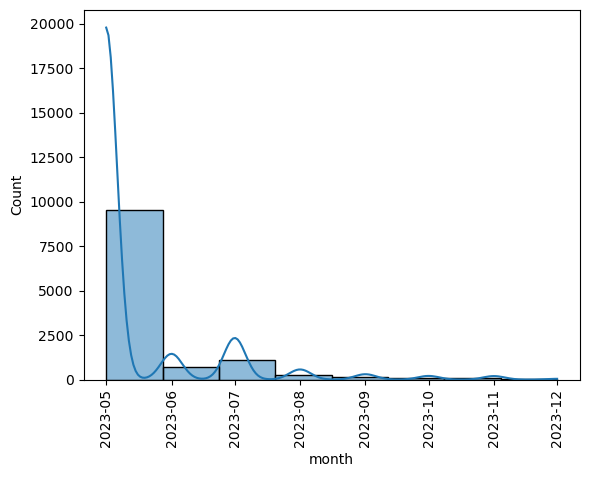

In [15]:
sea.histplot(x="month", data=df, bins=8, kde=True)
plt.xticks(rotation=90)
plt.show()

plt.savefig("./%s/histplot_month.jpg"%vid)

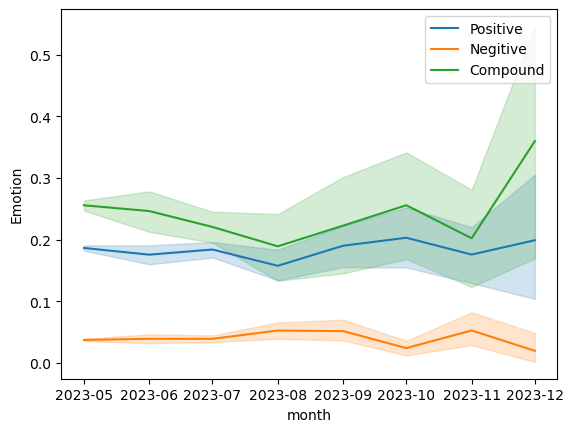

In [16]:
sea.lineplot(x="month", y="score_pos", data=df, label="Positive")
sea.lineplot(x="month", y="score_neg", data=df, label="Negitive")
sea.lineplot(x="month", y="score_comp", data=df, label="Compound")
plt.ylabel("Emotion")

#plt.show()

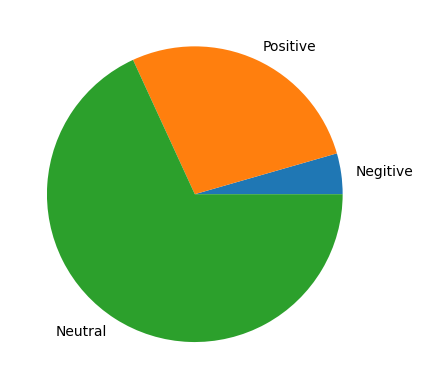

In [17]:
counts = [df[df["score_neg"] >= 0.2].count()[0], df[df["score_pos"] >= 0.2].count()[0], df[df["score_neu"] >= 0.2].count()[0]]
classes = ["Negitive", "Positive", "Neutral"]

plt.pie(counts, labels=classes)
plt.show()


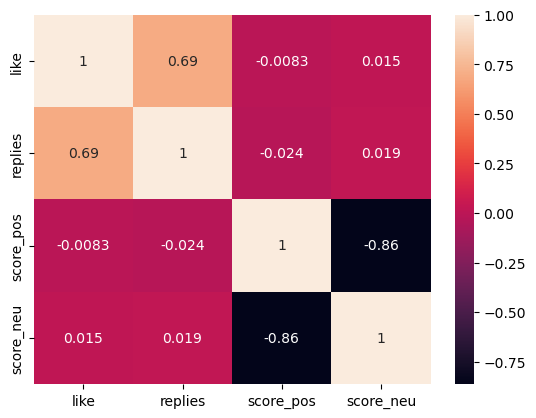

In [21]:
x=df[["like","replies","score_pos","score_neu"]]
sea.heatmap(data=x.corr(),annot=True)
plt.show()

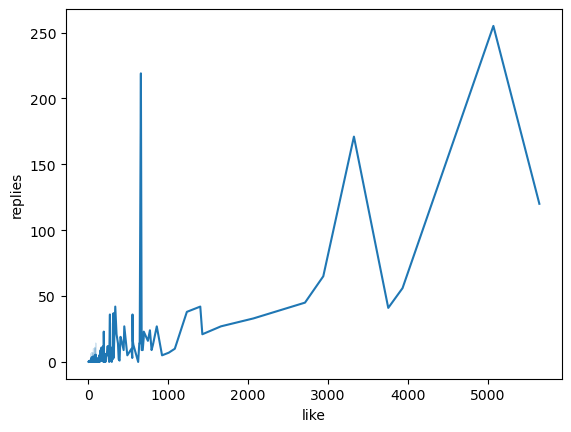

In [23]:
sea.lineplot(data=df,x="like",y="replies")
plt.show()

/home/someone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


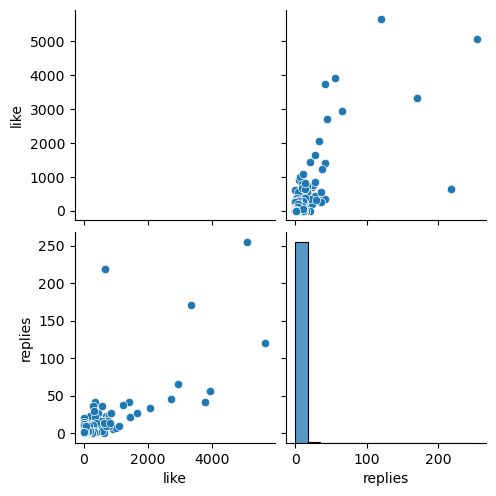

In [24]:
sea.pairplot(df,  vars = ['like', 'replies'])
plt.show()